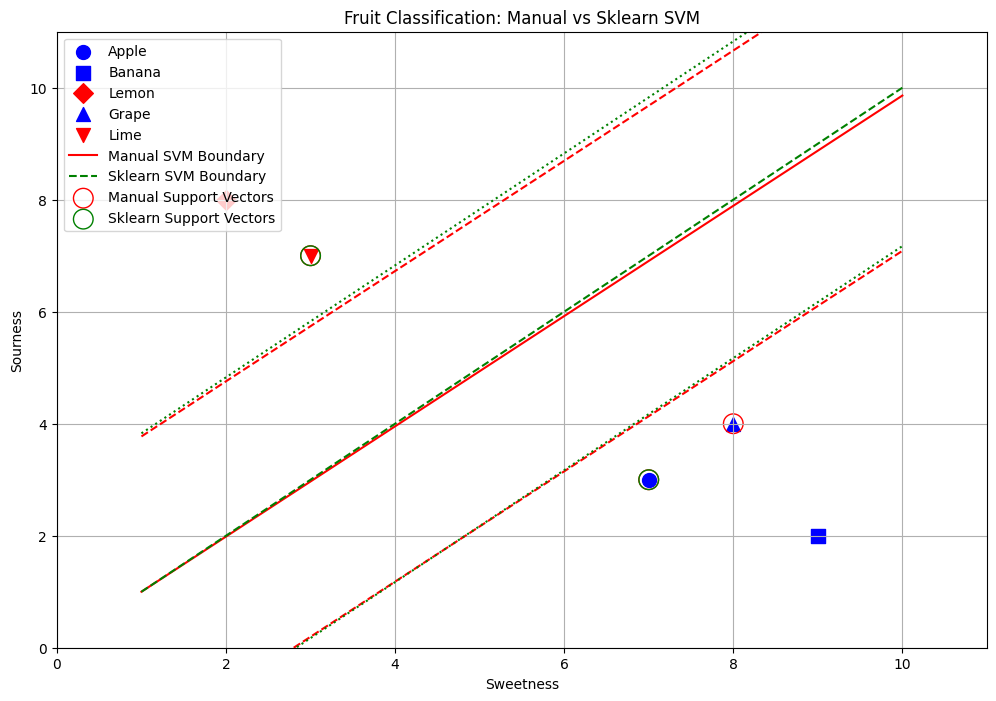

Manual SVM:
Weights: [ 0.253 -0.257]
Bias: 0.004
Margin width: 5.5458
Support Vectors:
[[7 3]
 [8 4]
 [3 7]]

Sklearn SVM:
Weights: [ 0.25 -0.25]
Bias: -0.0
Margin width: 5.6569
Support Vectors:
[[3. 7.]
 [7. 3.]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Read the data
df = pd.read_csv('fruit_data.csv')

# Assign classes: 1 for sweet (Apple, Banana, Grape), 0 for sour (Lemon, Lime)
df['Class'] = df['Fruit'].apply(lambda x: 1 if x in ['Apple', 'Banana', 'Grape'] else 0)

# Prepare data
X = df[['Sweetness', 'Sourness']].values
y = df['Class'].values

# Manual SVM Implementation (simplified version)
class ManualSVM:
    def __init__(self, learning_rate=0.001, max_iter=1000):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        # Convert y to -1 and 1 for SVM
        y_ = np.where(y <= 0, -1, 1)
        
        # Gradient descent
        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * 0 * self.w)  # No update for correctly classified
                else:
                    self.w -= self.lr * (2 * 0 * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    
    def get_params(self):
        return self.w, self.b
    
    def support_vectors(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        distances = y_ * (np.dot(X, self.w) + self.b)
        sv_indices = np.where(np.abs(distances - 1) < 0.1)[0]  # Points near margin
        return X[sv_indices]

# Train manual SVM
manual_svm = ManualSVM()
manual_svm.fit(X, y)
w_manual, b_manual = manual_svm.get_params()
support_vectors_manual = manual_svm.support_vectors(X, y)

# Train scikit-learn SVM
sklearn_svm = SVC(kernel='linear')
sklearn_svm.fit(X, y)
w_sklearn = sklearn_svm.coef_[0]
b_sklearn = sklearn_svm.intercept_[0]
support_vectors_sklearn = sklearn_svm.support_vectors_

# Plotting
plt.figure(figsize=(12, 8))

# A) Plot data points
colors = {1: 'blue', 0: 'red'}
markers = {'Apple': 'o', 'Banana': 's', 'Grape': '^', 'Lemon': 'D', 'Lime': 'v'}
for fruit in df['Fruit'].unique():
    fruit_data = df[df['Fruit'] == fruit]
    plt.scatter(fruit_data['Sweetness'], fruit_data['Sourness'], 
                c=colors[fruit_data['Class'].iloc[0]], 
                marker=markers[fruit], 
                label=fruit, 
                s=100)

# B) Plot decision boundaries
xx = np.linspace(1, 10)

# Manual SVM boundary
yy_manual = (-w_manual[0] / w_manual[1]) * xx - (b_manual / w_manual[1])
plt.plot(xx, yy_manual, 'r-', label='Manual SVM Boundary')

# Sklearn SVM boundary
yy_sklearn = (-w_sklearn[0] / w_sklearn[1]) * xx - (b_sklearn / w_sklearn[1])
plt.plot(xx, yy_sklearn, 'g--', label='Sklearn SVM Boundary')

# C) Highlight support vectors
# Manual support vectors
plt.scatter(support_vectors_manual[:, 0], support_vectors_manual[:, 1], 
            s=200, facecolors='none', edgecolors='red', 
            label='Manual Support Vectors')

# Sklearn support vectors
plt.scatter(support_vectors_sklearn[:, 0], support_vectors_sklearn[:, 1], 
            s=200, facecolors='none', edgecolors='green', 
            label='Sklearn Support Vectors')

# D) Plot margins
# Manual margin
margin_manual = 1 / np.sqrt(np.sum(w_manual ** 2))
yy_manual_down = yy_manual - margin_manual
yy_manual_up = yy_manual + margin_manual
plt.plot(xx, yy_manual_down, 'r--')
plt.plot(xx, yy_manual_up, 'r--')

# Sklearn margin
margin_sklearn = 1 / np.sqrt(np.sum(w_sklearn ** 2))
yy_sklearn_down = yy_sklearn - margin_sklearn
yy_sklearn_up = yy_sklearn + margin_sklearn
plt.plot(xx, yy_sklearn_down, 'g:')
plt.plot(xx, yy_sklearn_up, 'g:')

plt.xlabel('Sweetness')
plt.ylabel('Sourness')
plt.title('Fruit Classification: Manual vs Sklearn SVM')
plt.legend()
plt.grid(True)
plt.axis([0, 11, 0, 11])
plt.show()

# Print results
print("Manual SVM:")
print(f"Weights: {w_manual}")
print(f"Bias: {b_manual}")
print(f"Margin width: {2 * margin_manual:.4f}")
print(f"Support Vectors:\n{support_vectors_manual}")

print("\nSklearn SVM:")
print(f"Weights: {w_sklearn}")
print(f"Bias: {b_sklearn}")
print(f"Margin width: {2 * margin_sklearn:.4f}")
print(f"Support Vectors:\n{support_vectors_sklearn}")